___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
# Checking the shape of one image
X_train[7].shape

(28, 28)

In [7]:
X_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

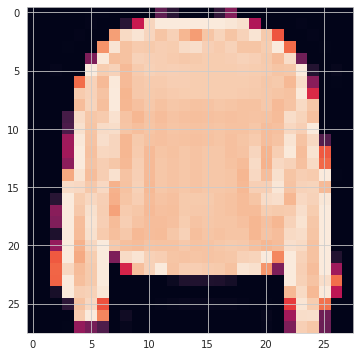

In [8]:
plt.imshow(X_train[7])
# plt.matshow(X_train[7])
plt.show()

In [9]:
y_train[9]

5

In [10]:
y_train.shape

(60000,)

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [13]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
classes[y_train[0]]

'Ankle boot'

In [15]:
classes[int(y_train[9])]

'Sandal'

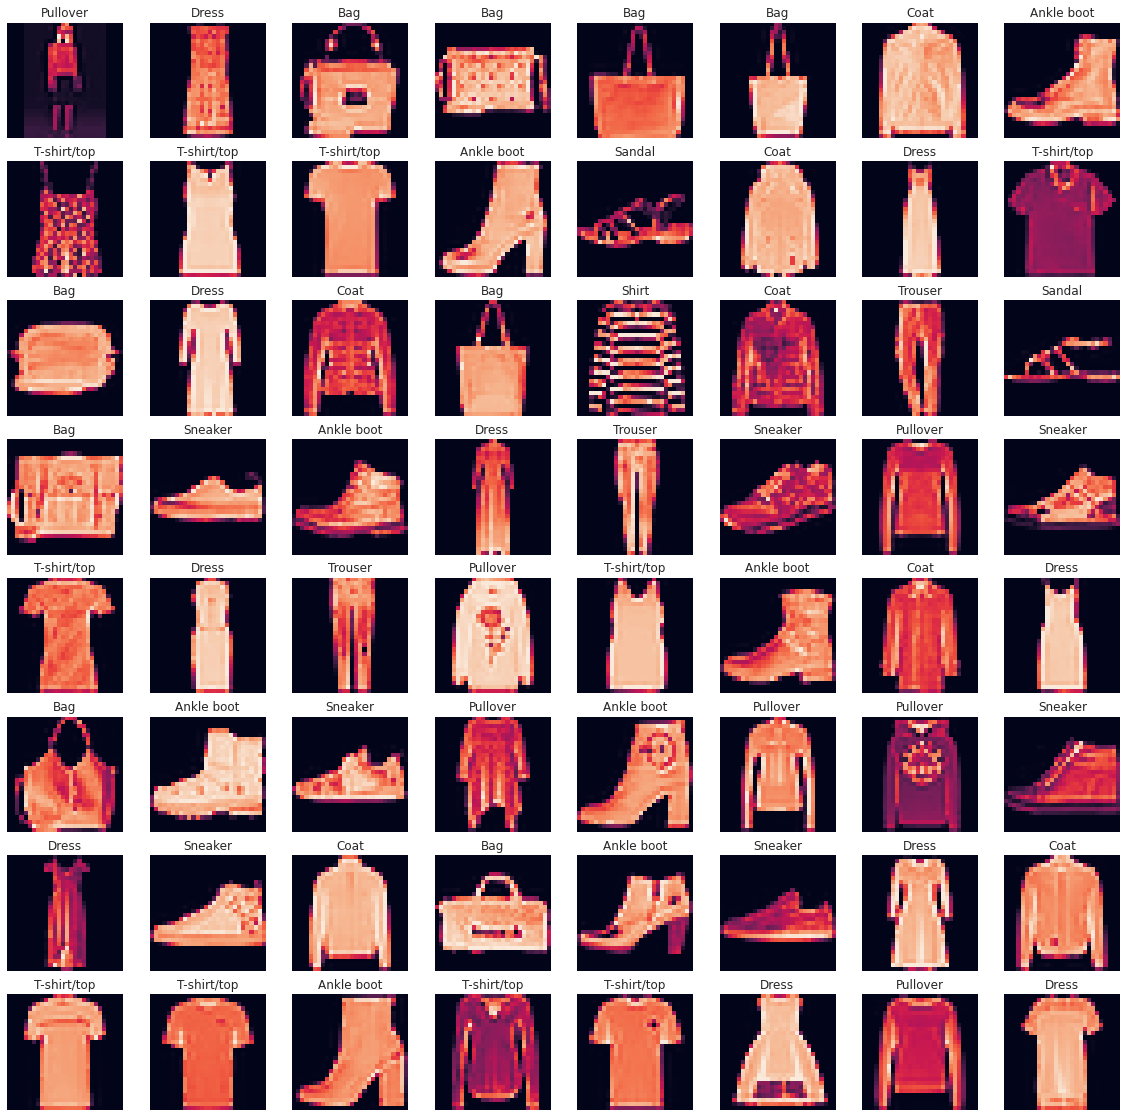

In [16]:
plt.figure(figsize=(20, 20))

for i in range(64):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
X_train[8].min()

0

In [18]:
X_train[8].max()

255

In [19]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
X_train[3].min()

0.0

In [21]:
X_train[3].max()

1.0

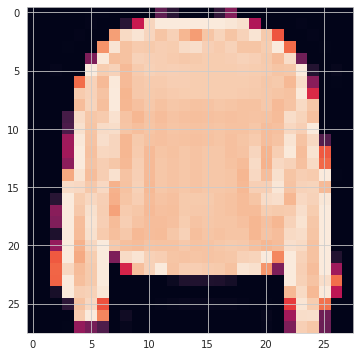

In [22]:
plt.imshow(X_train[7])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [25]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [27]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [31]:
y_train[6]

7

In [32]:
Y_train[6]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [33]:
X_train.shape[1:]

(28, 28, 1)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [35]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', strides=(1, 1), padding='same'))  # input_shape=X_train.shape[1:]
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1372)              0         
                                                                 
 dense (Dense)               (None, 128)               1

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss', mode="min", patience=2, restore_best_weights = True)

In [39]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 68s 36ms/step - loss: 0.4307 - accuracy: 0.8446 - val_loss: 0.3646 - val_accuracy: 0.8623
Epoch 2/50
1875/1875 [==============================] - 65s 34ms/step - loss: 0.2798 - accuracy: 0.8989 - val_loss: 0.2830 - val_accuracy: 0.9017
Epoch 3/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2437 - accuracy: 0.9111 - val_loss: 0.3031 - val_accuracy: 0.8881
Epoch 4/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2209 - accuracy: 0.9212 - val_loss: 0.2590 - val_accuracy: 0.9085
Epoch 5/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2093 - accuracy: 0.9254 - val_loss: 0.2851 - val_accuracy: 0.9014
Epoch 6/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2002 - accuracy: 0.9287 - val_loss: 0.2888 - val_accuracy: 0.9052


In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.431,0.845,0.365,0.862
1,0.280,0.899,0.283,0.902
2,0.244,0.911,0.303,0.888
3,0.221,0.921,0.259,0.909
4,0.209,0.925,0.285,0.901


**TASK 7: Plot values of metrics you used in your model.**

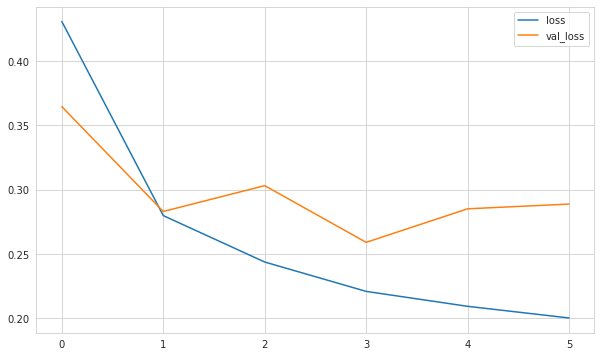

In [42]:
summary[["loss", "val_loss"]].plot();

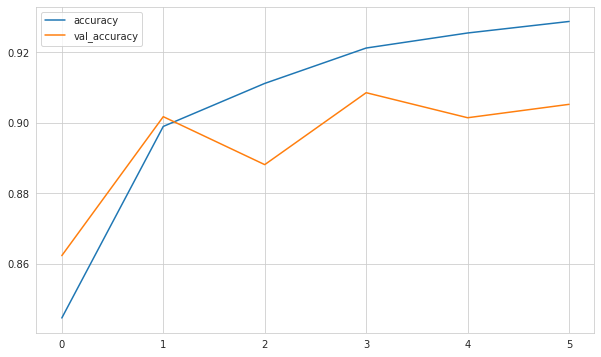

In [43]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2590 - accuracy: 0.9085


[0.25902822613716125, 0.9085000157356262]

In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25902822613716125
Test accuracy: 0.9085000157356262


## Prediction

In [47]:
pred_prob = model.predict(X_test)

In [48]:
y_pred = np.argmax(pred_prob, axis=1)

In [49]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.84      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.84      0.87      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.63      0.71      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [51]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [52]:
print(confusion_matrix(y_test, y_pred))

[[930   1   5  17   0   1  39   0   7   0]
 [  2 984   0   8   3   0   2   0   1   0]
 [ 36   1 845   7  68   0  42   0   1   0]
 [ 24   3   6 926  22   0  16   0   3   0]
 [  3   1  61  21 868   0  44   0   2   0]
 [  0   0   0   0   0 980   0  13   0   7]
 [194   3  57  31  72   0 634   0   9   0]
 [  0   0   0   0   0  11   0 967   0  22]
 [  5   1   0   3   2   2   0   3 984   0]
 [  0   0   0   0   0   2   1  30   0 967]]


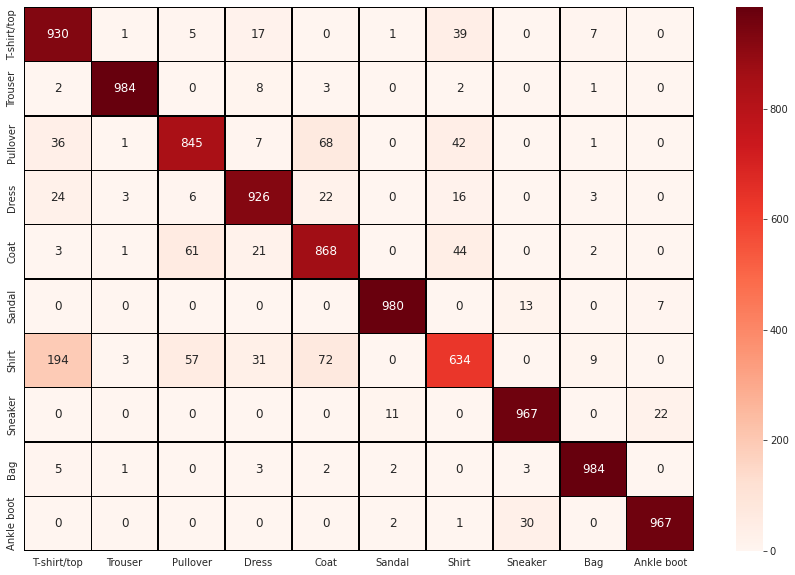

In [53]:
plt.figure(figsize=(15,10))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds", linewidths=.3, linecolor='black', xticklabels=classes, yticklabels=classes, fmt='g', annot_kws = {"size": 12})
plt.show()

In [54]:
(y_test != y_pred).sum() # Total of False predictions

915

# **Modelling-2**

In [55]:
from tensorflow.keras.layers import BatchNormalization

In [56]:
model2= Sequential()

model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=X_train.shape[1:], padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2)))
model2.add(Dropout(0.4))    
model2.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2)))
model2.add(Dropout(0.4))
        
model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                      

In [58]:
early_stop = EarlyStopping(monitor='val_accuracy', mode="max", patience=2, restore_best_weights = True)

In [59]:
model2.fit(X_train, Y_train, batch_size=32, epochs=30, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 375s 199ms/step - loss: 0.7618 - accuracy: 0.7419 - val_loss: 0.3638 - val_accuracy: 0.8742
Epoch 2/30
1875/1875 [==============================] - 369s 197ms/step - loss: 0.4661 - accuracy: 0.8495 - val_loss: 0.4142 - val_accuracy: 0.8625
Epoch 3/30
1875/1875 [==============================] - 368s 197ms/step - loss: 0.4068 - accuracy: 0.8691 - val_loss: 0.2807 - val_accuracy: 0.9059
Epoch 4/30
1875/1875 [==============================] - 370s 197ms/step - loss: 0.3679 - accuracy: 0.8814 - val_loss: 0.2636 - val_accuracy: 0.9096
Epoch 5/30
1875/1875 [==============================] - 371s 198ms/step - loss: 0.3491 - accuracy: 0.8882 - val_loss: 0.2555 - val_accuracy: 0.9108
Epoch 6/30
1875/1875 [==============================] - 368s 196ms/step - loss: 0.3275 - accuracy: 0.8954 - val_loss: 0.2562 - val_accuracy: 0.9141
Epoch 7/30
1875/1875 [==============================] - 366s 195ms/step - loss: 0.3184 - accuracy: 0.8997 - val_

In [60]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.762,0.742,0.364,0.874
1,0.466,0.850,0.414,0.863
2,0.407,0.869,0.281,0.906
3,0.368,0.881,0.264,0.910
4,0.349,0.888,0.255,0.911


Plot values of metrics you used in your model.

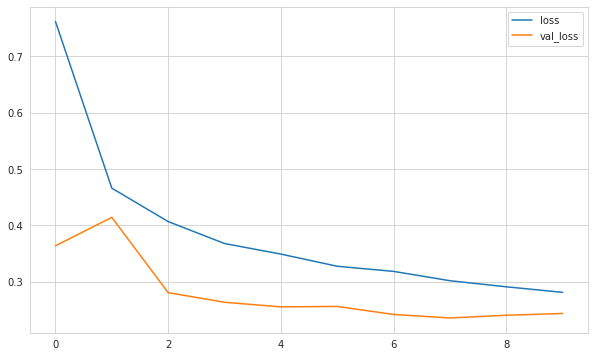

In [61]:
summary[["loss", "val_loss"]].plot();

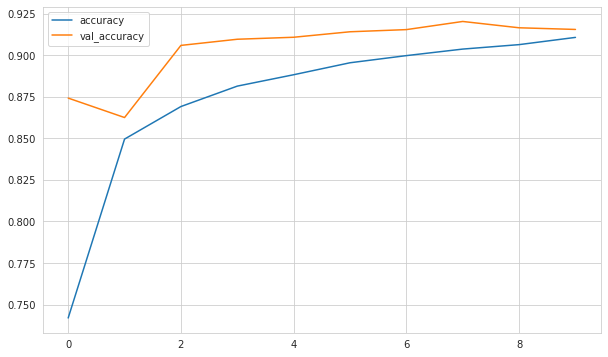

In [62]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.

In [63]:
score = model2.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23575493693351746
Test accuracy: 0.9203000068664551


## Prediction

In [64]:
pred_prob = model2.predict(X_test)

In [65]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.90      0.88      0.89      1000
           3       0.91      0.92      0.91      1000
           4       0.84      0.92      0.88      1000
           5       0.99      0.99      0.99      1000
           6       0.75      0.77      0.76      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.98      0.99      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [67]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [68]:
print(confusion_matrix(y_test, y_pred))

[[836   0  16  21   2   0 124   0   1   0]
 [  0 977   1  13   4   0   4   0   1   0]
 [ 13   1 876   9  50   0  51   0   0   0]
 [  4   1   7 923  24   0  41   0   0   0]
 [  0   0  22  20 920   0  38   0   0   0]
 [  0   0   0   0   0 986   0   9   0   5]
 [ 66   0  49  27  86   0 769   0   3   0]
 [  0   0   0   0   0   5   0 982   0  13]
 [  2   0   0   6   3   1   4   3 981   0]
 [  0   0   1   0   0   2   0  44   0 953]]


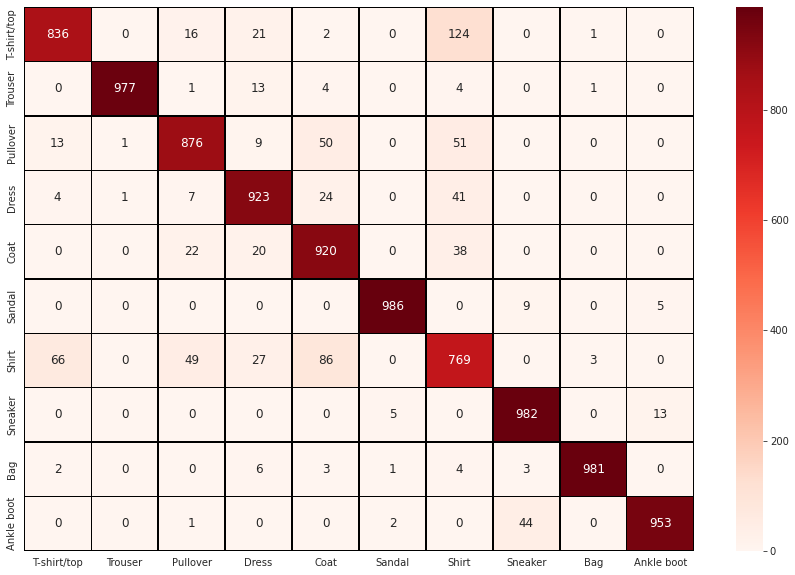

In [69]:
plt.figure(figsize=(15,10))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds", linewidths=.3, xticklabels=classes, yticklabels=classes, linecolor='black', fmt='g', annot_kws = {"size": 12})
plt.show()

In [70]:
(y_test != y_pred).sum() # Total of False predictions

797

In [72]:
# Percent of Total False Predictions
round((((y_test != y_pred).sum()) / len(y_test) * 100), 2)

7.97

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___